In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 1360
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # see the value of multiple statements at once.
pd.set_option('display.max_columns', None)

from PIL import Image, ImageFilter
import PIL as pillow

import random
import cv2, os, glob
from glob import glob
seed = 42
np.random.seed(seed)
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras import backend as K
from random import sample
from scipy.misc import imresize
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
K.set_image_dim_ordering('th')
from sklearn.metrics import confusion_matrix, classification_report



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [618]:
# import PIL as pillow
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm
# import os
# import pandas as pd
# import itertools as it
# #np.random.seed(123)  # for reproducibility

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Convolution2D, MaxPooling2D
# from keras.utils import np_utils
# from keras.datasets import mnist
# import cv2


In [147]:
df = pd.read_excel('ne_10m_lakes.xlsx', sheet="sheet1")

In [148]:
img= df.iloc[2,6]
name = df.iloc[2,9]+'.jpg'
name

'Engozero.jpg'

# Data Cleaning

In [149]:
df = pd.read_csv('./good_coords.csv')
df.head()

HouseNumber     Address        City             State        Country  \
0          NaN         NaN       Wiley  British Columbia         Canada   
1          NaN         NaN  Marsh lake             Yukon         Canada   
2          NaN         NaN       Truly           Montana         Canada   
3          NaN         NaN     Sayward  British Columbia         Canada   
4          0.0  Winter Trl      Kotlik                AK  United States   

     PostCode        County   Latitude   Longitude           name  \
0     V9N 1P9           NaN  67.415533 -126.377694            NaN   
1     Y0B 1T0           NaN  59.982692 -134.179318            NaN   
2     T9K 0K4           NaN  64.971428 -111.432358            NaN   
3     V0J 2T0           NaN  67.186371 -125.982007  Colville Lake   
4  99620-0316  Wade Hampton  62.639328 -163.556980            NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN

In [150]:
df1 = df.filter(items=['Country'], axis=1)
df1.head()

Country
0         Canada
1         Canada
2         Canada
3         Canada
4  United States

In [151]:
df2 = pd.read_csv('./count_WQI.csv')
df2.head()

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   Argentina       84.27         NaN         NaN         NaN         NaN   
1     Armenia       51.04         NaN         NaN         NaN         NaN   
2   Australia       61.74         NaN         NaN         NaN         NaN   
3  Azerbaijan       44.28         NaN         NaN         NaN         NaN   
4  Bangladesh       87.16         NaN         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [152]:
df2.rename(columns={'Unnamed: 0':'Country', 'Unnamed: 1':'WQI'}, inplace=True)
df2.head()

Country    WQI  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   Argentina  84.27         NaN         NaN         NaN         NaN   
1     Armenia  51.04         NaN         NaN         NaN         NaN   
2   Australia  61.74         NaN         NaN         NaN         NaN   
3  Azerbaijan  44.28         NaN         NaN         NaN         NaN   
4  Bangladesh  87.16         NaN         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [153]:
df3 = pd.merge(df,df2, left_on=['Country'],right_on=['Country'], how='left', indicator=True)
df3.head()

HouseNumber     Address        City             State        Country  \
0          NaN         NaN       Wiley  British Columbia         Canada   
1          NaN         NaN  Marsh lake             Yukon         Canada   
2          NaN         NaN       Truly           Montana         Canada   
3          NaN         NaN     Sayward  British Columbia         Canada   
4          0.0  Winter Trl      Kotlik                AK  United States   

     PostCode        County   Latitude   Longitude           name  \
0     V9N 1P9           NaN  67.415533 -126.377694            NaN   
1     Y0B 1T0           NaN  59.982692 -134.179318            NaN   
2     T9K 0K4           NaN  64.971428 -111.432358            NaN   
3     V0J 2T0           NaN  67.186371 -125.982007  Colville Lake   
4  99620-0316  Wade Hampton  62.639328 -163.556980            NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13    WQI  Unnamed: 2  \
0          NaN          NaN          NaN          NaN  93.11         NaN   
1          NaN          NaN          NaN          NaN  93.11         NaN   
2          NaN          NaN          NaN          NaN  93.11         NaN   
3          NaN          NaN          NaN          NaN  93.11         NaN   
4          NaN          NaN          NaN          NaN  77.47         NaN   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6 _merge  
0         NaN         NaN         NaN         NaN   both  
1         NaN         NaN         NaN         NaN   both  
2         NaN         NaN         NaN         NaN   both  
3         NaN         NaN         NaN         NaN   both  
4         NaN         NaN         NaN         NaN   both

# Final Dataframe

In [154]:
df4 = df3[['Latitude', 'Longitude', 'Country', 'name', 'WQI']]
df4.head()

Latitude   Longitude        Country           name    WQI
0  67.415533 -126.377694         Canada            NaN  93.11
1  59.982692 -134.179318         Canada            NaN  93.11
2  64.971428 -111.432358         Canada            NaN  93.11
3  67.186371 -125.982007         Canada  Colville Lake  93.11
4  62.639328 -163.556980  United States            NaN  77.47

In [155]:
df4.WQI.mean()

79.28924444444483

# Separating Data into Train and Test 

In [156]:
df4['Images'] = df4['Longitude'].map(lambda x: str(x) + '.jpg')
df4['train_test'] = 'train'
df4['train_test'].iloc[::5] = 'test'
df4.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Latitude   Longitude        Country               name    WQI  \
0   67.415533 -126.377694         Canada                NaN  93.11   
1   59.982692 -134.179318         Canada                NaN  93.11   
2   64.971428 -111.432358         Canada                NaN  93.11   
3   67.186371 -125.982007         Canada      Colville Lake  93.11   
4   62.639328 -163.556980  United States                NaN  77.47   
5   55.418135 -104.341226         Canada                NaN  93.11   
6   65.878953 -112.300403         Canada                NaN  93.11   
7   50.217162  -94.382672         Canada                NaN  93.11   
8   65.038837 -118.595150         Canada        Hottah Lake  93.11   
9   48.461722  -80.997832         Canada                NaN  93.11   
10  71.053285 -106.626298         Canada          Zeta Lake  93.11   
11  67.374617 -116.972026         Canada                NaN  93.11   
12  46.253255  -79.843582         Canada     Lake Nipissing  93.11   
13  44.753911  -76.217376         Canada    Big Rideau Lake  93.11   
14  48.544732  -75.948798         Canada                NaN  93.11   
15  33.017319 -107.288341  United States  Caballo Reservoir  77.47   
16  21.866511 -105.468178         Mexico                NaN  61.42   
17  64.239344 -116.169489         Canada                NaN  93.11   
18  56.446201  -95.198662         Canada                NaN  93.11   
19  60.110152  -75.357857         Canada                NaN  93.11   

                     Images train_test  
0     -126.377694045249.jpg       test  
1     -134.179317812668.jpg      train  
2     -111.432358446463.jpg      train  
3   -125.98200712226401.jpg      train  
4     -163.556980334003.jpg      train  
5   -104.34122646468799.jpg       test  
6     -112.300403496523.jpg      train  
7     -94.3826717298093.jpg      train  
8     -118.595150417946.jpg      train  
9    -80.99783173624608.jpg      train  
10  -106.62629847051001.jpg       test  
11    -116.972026477743.jpg      train  
12    -79.8435816912243.jpg      train  
13    -76.2173755618582.jpg      train  
14     -75.948798046286.jpg      train  
15     -107.28834133199.jpg       test  
16  -105.46817844133498.jpg      train  
17  -116.16948919800501.jpg      train  
18    -95.1986619946197.jpg      train  
19    -75.3578571064422.jpg      train

WQI= source http://waterriskfilter.panda.org/en/CountryProfiles#1/profileDescription:
Subindex of the Environmental Performance Index (EPI). It uses three parameters measuring nutrient levels (Dissolved Oxygen, Total Nitrogen, and Total Phosphorus) and two parameters measuring water chemistry (pH and Conductivity). These parameters were selected because they cover issues of global relevance (eutrophication, nutrient pollution, acidification, and salinization) and because they are the most consistently reported.
Source: 
Link: http://epi.yale.edu/

In [157]:
df4.dtypes

Latitude      float64
Longitude     float64
Country        object
name           object
WQI           float64
Images         object
train_test     object
dtype: object

# Setting the Threshold
Making Water Quality Index into a binary classification based on threshold

In [158]:
df4['WQI'] = df4['WQI'].map(lambda x: 1 if x>79.0 else 0)
df4

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Latitude   Longitude                      Country  \
0     67.415533 -126.377694                       Canada   
1     59.982692 -134.179318                       Canada   
2     64.971428 -111.432358                       Canada   
3     67.186371 -125.982007                       Canada   
4     62.639328 -163.556980                United States   
5     55.418135 -104.341226                       Canada   
6     65.878953 -112.300403                       Canada   
7     50.217162  -94.382672                       Canada   
8     65.038837 -118.595150                       Canada   
9     48.461722  -80.997832                       Canada   
10    71.053285 -106.626298                       Canada   
11    67.374617 -116.972026                       Canada   
12    46.253255  -79.843582                       Canada   
13    44.753911  -76.217376                       Canada   
14    48.544732  -75.948798                       Canada   
15    33.017319 -107.288341                United States   
16    21.866511 -105.468178                       Mexico   
17    64.239344 -116.169489                       Canada   
18    56.446201  -95.198662                       Canada   
19    60.110152  -75.357857                       Canada   
20    50.454125  -92.872230                       Canada   
21    53.782500  -90.022834                       Canada   
22    64.547544 -117.767190                       Canada   
23    46.006136  -69.340907                United States   
24    54.896374 -109.734065                       Canada   
25    50.310181  -80.329595                       Canada   
26    70.803517 -108.291287                       Canada   
27    51.355910  -76.870625                       Canada   
28    54.059203 -102.301897                       Canada   
29    59.807104 -109.088930                       Canada   
30    56.338906  -76.312032                       Canada   
31    32.929451  -86.505828                United States   
32    51.165898  -93.251945                       Canada   
33    50.025825  -77.456681                       Canada   
34    69.928078 -112.539754                       Canada   
35    64.229778 -111.442075                       Canada   
36    33.265909 -107.160019                United States   
37    57.613944 -156.778335                United States   
38     6.283169   -5.087301                Cote d'Ivoire   
39    54.064943 -101.077189                       Canada   
40    15.355324   -4.143349                         Mali   
41    52.333493  -85.213878                       Canada   
42    47.378020  -76.626072                       Canada   
43    63.983689 -119.066426                       Canada   
44    50.946449 -106.898092                       Canada   
45    66.484607 -159.837158                United States   
46    53.852117  -94.247586                       Canada   
47    69.206886 -111.214347                       Canada   
48    60.936432 -117.654482                       Canada   
49    54.217718 -100.786984                       Canada   
50    51.116886  -91.498530                       Canada   
51    60.230841 -115.507797                       Canada   
52    63.570255   12.988414                       Sweden   
53    52.723967  -65.312569                       Canada   
54    51.630699   14.389924                      Germany   
55    52.682756  -66.143612                       Canada   
56    60.141501   16.349335                       Sweden   
57    52.788286  -90.593851                       Canada   
58    48.567251  -75.611270                       Canada   
59    59.745140 -118.809234                       Canada   
60    54.385358   19.588656                       Poland   
61    69.066916 -110.621738                       Canada   
62    48.701628  -79.571309                       Canada   
63    64.624078 -121.620540                       Canada   
64    65.949747   29.625193                      Finland   
65    51.942136  -91.941169                    

In [13]:
# #pd.Series(df4['Images'])#.cat(df4[['WQI']], sep=' ')

# #df4['new_temp_thing'] = df4['Images']
# #df4.loc[df4['WQI'] == 1, 'new_temp_thing'].map(lambda s: '{0} {1}'.format(s, 1))
# #df4.loc[df4['WQI'] == 0, 'new_temp_thing'].map(lambda s: '{0} {1}'.format(s, 0));

# row_images = df4.Images
# row_wqi = df4.WQI

# row_output = []
# for a, b in zip(row_images, row_wqi):
#     row_output.append('{0}{1}'.format(a, b))
    
# df4['Image_label'] = pd.Series(row_output)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
#df4


Latitude   Longitude                      Country  \
0     67.415533 -126.377694                       Canada   
1     59.982692 -134.179318                       Canada   
2     64.971428 -111.432358                       Canada   
3     67.186371 -125.982007                       Canada   
4     62.639328 -163.556980                United States   
5     55.418135 -104.341226                       Canada   
6     65.878953 -112.300403                       Canada   
7     50.217162  -94.382672                       Canada   
8     65.038837 -118.595150                       Canada   
9     48.461722  -80.997832                       Canada   
10    71.053285 -106.626298                       Canada   
11    67.374617 -116.972026                       Canada   
12    46.253255  -79.843582                       Canada   
13    44.753911  -76.217376                       Canada   
14    48.544732  -75.948798                       Canada   
15    33.017319 -107.288341                United States   
16    21.866511 -105.468178                       Mexico   
17    64.239344 -116.169489                       Canada   
18    56.446201  -95.198662                       Canada   
19    60.110152  -75.357857                       Canada   
20    50.454125  -92.872230                       Canada   
21    53.782500  -90.022834                       Canada   
22    64.547544 -117.767190                       Canada   
23    46.006136  -69.340907                United States   
24    54.896374 -109.734065                       Canada   
25    50.310181  -80.329595                       Canada   
26    70.803517 -108.291287                       Canada   
27    51.355910  -76.870625                       Canada   
28    54.059203 -102.301897                       Canada   
29    59.807104 -109.088930                       Canada   
30    56.338906  -76.312032                       Canada   
31    32.929451  -86.505828                United States   
32    51.165898  -93.251945                       Canada   
33    50.025825  -77.456681                       Canada   
34    69.928078 -112.539754                       Canada   
35    64.229778 -111.442075                       Canada   
36    33.265909 -107.160019                United States   
37    57.613944 -156.778335                United States   
38     6.283169   -5.087301                Cote d'Ivoire   
39    54.064943 -101.077189                       Canada   
40    15.355324   -4.143349                         Mali   
41    52.333493  -85.213878                       Canada   
42    47.378020  -76.626072                       Canada   
43    63.983689 -119.066426                       Canada   
44    50.946449 -106.898092                       Canada   
45    66.484607 -159.837158                United States   
46    53.852117  -94.247586                       Canada   
47    69.206886 -111.214347                       Canada   
48    60.936432 -117.654482                       Canada   
49    54.217718 -100.786984                       Canada   
50    51.116886  -91.498530                       Canada   
51    60.230841 -115.507797                       Canada   
52    63.570255   12.988414                       Sweden   
53    52.723967  -65.312569                       Canada   
54    51.630699   14.389924                      Germany   
55    52.682756  -66.143612                       Canada   
56    60.141501   16.349335                       Sweden   
57    52.788286  -90.593851                       Canada   
58    48.567251  -75.611270                       Canada   
59    59.745140 -118.809234                       Canada   
60    54.385358   19.588656                       Poland   
61    69.066916 -110.621738                       Canada   
62    48.701628  -79.571309                       Canada   
63    64.624078 -121.620540                       Canada   
64    65.949747   29.625193                      Finland   
65    51.942136  -91.941169                    

In [676]:
# renaming_dict = df4[['Images', 'Image_label']].set_index('Images').to_dict()

# import os

# directories = ['./Pics_by_lat', './Test_Images/']
# for d in directories:
#     for (a, b, c) in os.walk(d):
#         for filename in c:
#             oldpath = os.path.join(d, filename)
#             newpath = os.path.join(d, renaming_dict.get(filename, 'ERROR'))
#             print(oldpath,'->',newpath)
#         break



./Pics_by_lat/-100.204100308034.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.355534097749.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.42862704389.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.458946293738.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.506977291747.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.555525705575.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.78698383198.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-100.859236332062.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.077189173698.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.138890128492.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.225920433054.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.38983879088.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.655519729526.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.656513153124.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.687682799391.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.689025922872.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/-101.771460328576.jpg -> ./Pics_by_lat/ERROR


./Pics_by_lat/11.4754951439778.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/11.6782452146611.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/11.7641064825215.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/11.8647117670232.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/11.9265964420535.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.23795832905.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.309581219729.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.532893431761.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.565647199061.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.649553536115.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.768647332494.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/111.958734299236.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/112.166820058762.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/112.263601781743.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/112.433069011564.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/112.479894997844.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/112.555348214138.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/1

./Pics_by_lat/68.3879508641699.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/68.538677369905.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/68.9186846502945.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/69.0321233100848.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/69.0822604595184.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/69.1906397851374.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/69.233989941324.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/69.8685616473039.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/69.9935708481036.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.1640137678175.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.1845805245947.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.4611511789626.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.4649880269778.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.4675903534973.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.6427686429922.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/70.9437626730544.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/71.1560570850281.jpg -> ./Pics_by_lat/ERROR
./Pics_by_lat/71

./Test_Images/-99.3610595046512.jpg -> ./Test_Images/ERROR
./Test_Images/-99.4507748461261.jpg -> ./Test_Images/ERROR
./Test_Images/-99.7865928057203.jpg -> ./Test_Images/ERROR
./Test_Images/10.7084775038501.jpg -> ./Test_Images/ERROR
./Test_Images/100.721583470272.jpg -> ./Test_Images/ERROR
./Test_Images/103.109171348756.jpg -> ./Test_Images/ERROR
./Test_Images/107.124339866307.jpg -> ./Test_Images/ERROR
./Test_Images/11.1570994957017.jpg -> ./Test_Images/ERROR
./Test_Images/11.8439152134927.jpg -> ./Test_Images/ERROR
./Test_Images/111.493128964852.jpg -> ./Test_Images/ERROR
./Test_Images/111.858467720236.jpg -> ./Test_Images/ERROR
./Test_Images/112.528085769086.jpg -> ./Test_Images/ERROR
./Test_Images/113.105047386821.jpg -> ./Test_Images/ERROR
./Test_Images/114.222800192129.jpg -> ./Test_Images/ERROR
./Test_Images/114.4357264977.jpg -> ./Test_Images/ERROR
./Test_Images/114.592986758721.jpg -> ./Test_Images/ERROR
./Test_Images/114.950258311293.jpg -> ./Test_Images/ERROR
./Test_Images

In [219]:
df4.shape

(1354, 3)

In [220]:
df4.WQI.mean()

0.6048744460856721

In [221]:
df4.WQI.value_counts()

1    819
0    535
Name: WQI, dtype: int64

In [222]:
PATHTRAIN = os.path.abspath(os.path.join('./Pics_by_long'))
source_images_train = os.listdir(PATHTRAIN) 
PATHTEST = os.path.abspath(os.path.join('./Test_Images_Generator'))
source_images_test = os.listdir(PATHTEST) 
print('train images:',source_images_train[0:3])
print('test images:',source_images_test[0:3])

train images: ['-100.204100308034.jpg', '-100.355534097749.jpg', '-100.42862704389.jpg']
test images: ['-100.044725309626.jpg', '-100.15037166727.jpg', '-100.485917101634.jpg']


In [223]:
cols_to_keep = ['WQI','Images','train_test']
df4= df4[cols_to_keep]

train = df4[df4['train_test'] == 'train']   # Rows in the (total Kaggle) train set
test = df4[df4['train_test'] == 'test']   # Rows in the testing set

print(train.shape)
# train = train[
#     train['Images'].isin(source_images_train)]   # train is already much small because of the minimum restriction
# print(train.shape)
print(test.shape)
# test = test[
#     test['Images'].isin(source_images_test)]   # train is already much small because of the minimum restriction
# print(test.shape)  # makes sense to be of the same size since all test set of Kaggle was downloaded
# path = './Pics_by_lat/'


(1083, 3)
(271, 3)


In [224]:
train.WQI.mean()

0.6038781163434903

In [225]:
test.WQI.mean()

0.6088560885608856

In [164]:
train['Images'].tolist()[0:2]

['-134.179317812668.jpg', '-111.432358446463.jpg']

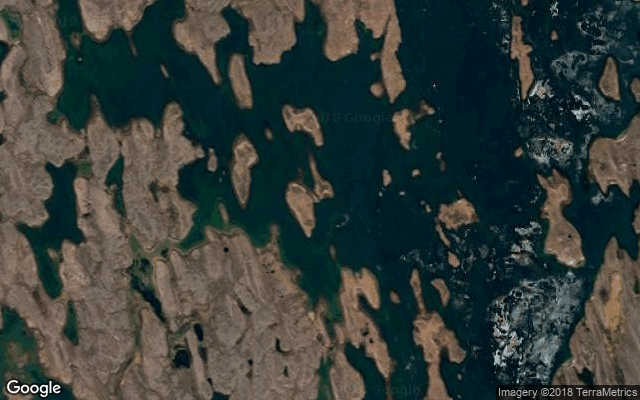

In [22]:
img = load_img(os.path.join(PATHTRAIN,source_images_train[7])) 
img

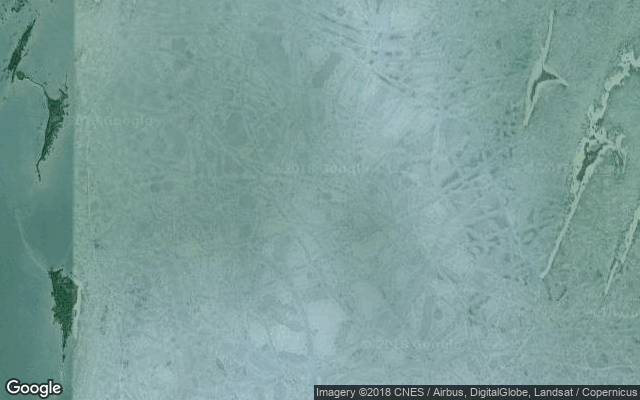

In [23]:
img_2 = load_img(os.path.join(PATHTEST,source_images_test[0]))
img_2

In [24]:
os.listdir(PATHTRAIN)

['-100.204100308034.jpg',
 '-100.355534097749.jpg',
 '-100.42862704389.jpg',
 '-100.458946293738.jpg',
 '-100.506977291747.jpg',
 '-100.555525705575.jpg',
 '-100.78698383198.jpg',
 '-100.859236332062.jpg',
 '-101.077189173698.jpg',
 '-101.138890128492.jpg',
 '-101.225920433054.jpg',
 '-101.38983879088.jpg',
 '-101.655519729526.jpg',
 '-101.656513153124.jpg',
 '-101.687682799391.jpg',
 '-101.689025922872.jpg',
 '-101.771460328576.jpg',
 '-101.824344231992.jpg',
 '-101.863083179338.jpg',
 '-101.996172560318.jpg',
 '-102.211299120928.jpg',
 '-102.227357147259.jpg',
 '-102.301896818829.jpg',
 '-102.316042141072.jpg',
 '-102.347052827372.jpg',
 '-102.353130360152.jpg',
 '-102.583179298982.jpg',
 '-102.820797613811.jpg',
 '-102.970992375056.jpg',
 '-103.020935036998.jpg',
 '-103.043322029609.jpg',
 '-103.045388890853.jpg',
 '-103.127266718821.jpg',
 '-103.2448406642.jpg',
 '-103.340301534505.jpg',
 '-103.368325824542.jpg',
 '-103.372343680271.jpg',
 '-103.491792773045.jpg',
 '-103.6293715826

In [173]:
train_polluted = train[train['WQI'] == 0]
train_clean = train[train['WQI'] == 1]
test_polluted = test[test['WQI'] == 0]
test_clean = test[test['WQI'] == 1]

In [174]:
test_clean[test_clean['WQI']==i]['Images']

NameError: name 'i' is not defined

In [175]:
# test_clean['Images'].tolist()
# test_polluted['Images'].tolist()
# l = []
# l.append(test_clean['Images'].tolist())
# l.append(test_polluted['Images'].tolist())

In [129]:
len(l)

2

In [ ]:
# lst_test = []
# for i in range(2):
#     lst_train.append(list(test_clean[test_clean['WQI']==i]['Images']))

In [110]:
train_polluted.Images

16      -105.46817844133498.jpg
38         -5.0873014838046.jpg
68       30.892245709534603.jpg
77      -105.04433517407601.jpg
84       2.4656417247380698.jpg
127        31.5081864241111.jpg
131      61.607582565811605.jpg
134        45.3627400485852.jpg
149       92.76862124220659.jpg
161      37.772777377530105.jpg
202       -100.204100308034.jpg
204        26.3963531876201.jpg
211       77.63238547657609.jpg
212        83.4350769928513.jpg
226        37.3821976920955.jpg
243     -103.04332202960899.jpg
268        72.9384376932763.jpg
279        29.9243223985814.jpg
281      43.440854833440895.jpg
298      4.5654831197025905.jpg
336        137.298600313602.jpg
337       -105.441287664631.jpg
362        43.2224941954673.jpg
369        34.0675356175121.jpg
371        43.5720026213699.jpg
394       -89.0315185686819.jpg
402       -88.7723639309152.jpg
406      38.416073347932205.jpg
412        35.4778479489184.jpg
428       38.80534340233589.jpg
433     -109.35321944810998.jpg
441     

Creating Sub-Folders of Train: clean, polluted and Test: clean, polluted to be used 
for imagedatagenerator

In [85]:
#%mkdir './Pics_by_lat_new2'

In [86]:
# %mkdir './Pics_by_lat_new2/train_polluted'
# %mkdir './Pics_by_lat_new2/train_clean'

In [131]:
# def subfolder_maker_multi(PATH,PATHDUMP,lst):
#     for sublist in tqdm(lst): # fix a sublist, 
#         for el in sublist:   
#             img = Image.open(os.path.join(PATH,el))  # creates PIL image 
#             img.save(os.path.join(PATHDUMP,
#                                  l[lst.index(sublist)]))

In [143]:
l[l.index(l[0])]

['-126.377694045249.jpg',
 '-104.34122646468799.jpg',
 '-106.62629847051001.jpg',
 '-107.28834133199.jpg',
 '-92.8722295766169.jpg',
 '-80.32959475879159.jpg',
 '-76.31203240456792.jpg',
 '-111.442075308444.jpg',
 '-4.1433487110264595.jpg',
 '-159.83715772815202.jpg',
 '-91.4985303400966.jpg',
 '-66.143612171532.jpg',
 '19.5886556675379.jpg',
 '-91.9411685599122.jpg',
 '-70.63482155536809.jpg',
 '-71.90722096055191.jpg',
 '-103.934001164167.jpg',
 '-107.887638753108.jpg',
 '-117.43594973749501.jpg',
 '-79.43460444338041.jpg',
 '97.68877057540979.jpg',
 '-108.949546692363.jpg',
 '70.1640137678175.jpg',
 '-89.2094685015836.jpg',
 '-73.03503059895121.jpg',
 '29.091357171483697.jpg',
 '-86.859870705431.jpg',
 '-71.2384623079011.jpg',
 '-93.6801438300572.jpg',
 '-138.222462872236.jpg',
 '-88.78352832746491.jpg',
 '-90.2141822259766.jpg',
 '-138.792404874444.jpg',
 '-78.9603238384195.jpg',
 '-122.67872506812999.jpg',
 '-110.328518274711.jpg',
 '-76.84637924906221.jpg',
 '70.94376267305441.jp

In [169]:
#subfolder_maker_multi(PATHTRAIN, PATHDUMP, l.index(l[0]))

In [170]:
#os.listdir('/Users/tovahirsch/Desktop/Capstone/Pics_by_long').index('-126.377694045249.jpg')

In [176]:
def subfolder_maker(PATHTRAIN,PATHDUMPCLEANTRAIN,
                    PATHDUMPPOLLUTEDTRAIN,original_images,
                    original_images_not):
    for image_filename in tqdm(os.listdir(PATHTRAIN)[1:]):         
        img = Image.open(os.path.join(PATHTRAIN, 
                                      image_filename)).convert('RGB')  # PATH contains all training or testing set
        
        if image_filename in original_images:           # original_images contains all
#             print(os.path.join(PATHDUMP, 
#                                   image_filename))
            img.save(os.path.join(PATHDUMPCLEANTRAIN, 
                                  image_filename))      
        elif image_filename in original_images_not:
            img.save(os.path.join(PATHDUMPPOLLUTEDTRAIN, 
                                  image_filename))            

In [177]:
PATHTRAIN = os.path.abspath('./Pics_by_long')
PATHDUMP = os.path.abspath('./Pics_by_long_split')
# PATHDUMPCLEANTRAIN= os.path.abspath('./Pics_by_lat_new2/train_clean')
# PATHDUMPPOLLUTEDTRAIN = os.path.abspath('./Pics_by_lat_new2/train_polluted')

In [178]:
os.path.abspath('./Pics_by_long')



'/Users/tovahirsch/Desktop/Capstone/Pics_by_long'

In [179]:
%mkdir '/Users/tovahirsch/Desktop/Capstone/Pics_by_long_split'

mkdir: /Users/tovahirsch/Desktop/Capstone/Pics_by_long_split: File exists


In [180]:
PATHTRAIN = os.path.abspath('./Pics_by_long')
PATHDUMPCLEANTRAIN= os.path.abspath('./Pics_by_lat_new2/train_clean')
PATHDUMPPOLLUTEDTRAIN = os.path.abspath('./Pics_by_lat_new2/train_polluted')
subfolder_maker(PATHTRAIN,PATHDUMPCLEANTRAIN,
                    PATHDUMPPOLLUTEDTRAIN,train_clean['Images'].tolist(),
                train_polluted['Images'].tolist())

100%|██████████| 1080/1080 [00:11<00:00, 93.00it/s]


In [181]:
%mkdir './Test_Images_new2'
%mkdir './Test_Images_new2/test_polluted1'
%mkdir './Test_Images_new2/test_clean1'

mkdir: ./Test_Images_new2: File exists
mkdir: ./Test_Images_new2/test_polluted1: File exists
mkdir: ./Test_Images_new2/test_clean1: File exists


In [182]:
def subfolder_maker(PATHTEST,PATHDUMPCLEANTEST,
                    PATHDUMPPOLLUTEDTEST,original_images,
                    original_images_not):
    for image_filename in tqdm(os.listdir(PATHTEST)[1:]):          
        img = Image.open(os.path.join(PATHTEST, 
                                      image_filename)).convert('RGB')  # PATH contains all training or testing set
        
        if image_filename in original_images:           
#             
            img.save(os.path.join(PATHDUMPCLEANTEST, 
                                  image_filename))     
        elif image_filename in original_images_not:
            img.save(os.path.join(PATHDUMPPOLLUTEDTEST, 
                                  image_filename)) 

In [183]:
PATHTEST = os.path.abspath('./Test_Images_Generator')
PATHDUMPCLEANTEST= os.path.abspath('./Test_Images_new2/test_clean1')
PATHDUMPPOLLUTEDTEST = os.path.abspath('./Test_Images_new2/test_polluted1')

In [184]:
PATHTEST = os.path.abspath('./Test_Images_Generator')
PATHDUMPCLEANTEST= os.path.abspath('./Test_Images_new2/test_clean1')
PATHDUMPPOLLUTEDTEST = os.path.abspath('./Test_Images_new2/test_polluted1')
subfolder_maker(PATHTEST,PATHDUMPCLEANTEST,PATHDUMPPOLLUTEDTEST,
                test_clean['Images'].tolist(),
                test_polluted['Images'].tolist())

 39%|███▊      | 103/267 [00:00<00:01, 139.33it/s]/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|██████████| 267/267 [00:02<00:00, 129.16it/s]


source_images_train[0:2]
print(PATHTRAIN)
print(PATHDUMPCLEANTRAIN)
print(PATHDUMPPOLLUTEDTRAIN)

In [186]:
train_clean['Images'].tolist()[0:2]

['-134.179317812668.jpg', '-111.432358446463.jpg']

print(source_images_train[0:2])
print(PATHTRAIN)
print(PATHDUMPCLEANTRAIN)
print(PATHDUMPPOLLUTEDTRAIN)
print(train_clean['Images'].tolist()[0:2])
print(train_polluted['Images'].tolist()[0:2])

In [67]:
train_clean.head()

WQI                   Images train_test
1    1    -134.179317812668.jpg      train
2    1    -111.432358446463.jpg      train
3    1  -125.98200712226401.jpg      train
4    1    -163.556980334003.jpg      train
6    1    -112.300403496523.jpg      train

In [68]:
train_polluted.head()

WQI                   Images train_test
16    0  -105.46817844133498.jpg      train
38    0     -5.0873014838046.jpg      train
68    0   30.892245709534603.jpg      train
77    0  -105.04433517407601.jpg      train
84    0   2.4656417247380698.jpg      train

In [51]:
test_clean.head()

WQI                   Images train_test
0     1    -126.377694045249.jpg       test
5     1  -104.34122646468799.jpg       test
10    1  -106.62629847051001.jpg       test
15    1     -107.28834133199.jpg       test
20    1    -92.8722295766169.jpg       test

In [49]:
test_polluted.head()

WQI                   Images train_test
195    0  -100.55552570557501.jpg       test
230    0   -89.06119396567459.jpg       test
255    0   -86.39916967100159.jpg       test
355    0    -101.824344231992.jpg       test
375    0    -92.5488919361839.jpg       test

# Preview of ImageDataGenerator for one image

In [187]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.8,
        horizontal_flip=True,
        fill_mode='nearest')

In [188]:
#%mkdir './Pics_by_lat/preview'

In [189]:
PATHPREVIEW = '/Users/tovahirsch/Desktop/Capstone/preview2'

In [58]:
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/-98.7457218414528.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/preview' 
                          , save_prefix='lake', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [64]:
PATHPREVIEW = '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/preview'
x = img_to_array(img) 
print('x shape is:',x.shape)

x shape is: (3, 400, 640)


In [60]:
x = x.reshape((1,) + x.shape) 
print('new x shape is:',x.shape)


new x shape is: (1, 3, 400, 640)


What the Generator does:
Original Image

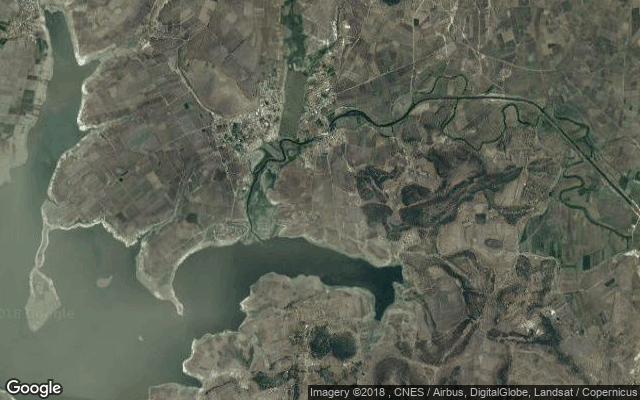

In [60]:
img = load_img('/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/-100.204100308034.jpg')
img

Generated Images:

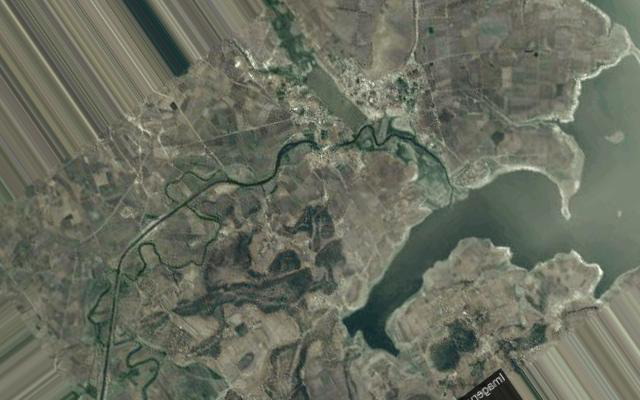

In [62]:
img_2 = load_img('/Users/tovahirsch/Desktop/Capstone/preview/lake_0_1202.jpeg')
img_2

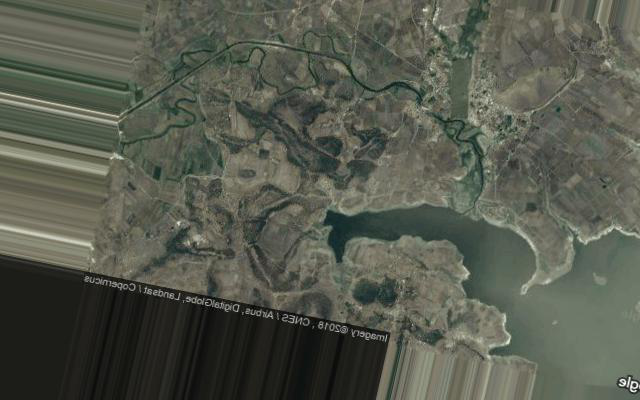

In [63]:
img_2 = load_img('/Users/tovahirsch/Desktop/Capstone/preview/-100_0_5539.jpg')
img_2


In [69]:
os.path.join(PATHTRAIN,source_images_train[2])

'/Users/tovahirsch/Desktop/Capstone/Pics_by_lat_new1/-100.42862704389.jpg'

In [62]:
print('Name of the image file is: ',source_images_train[0])
print("Name of the image file without file format '.' is",source_images_train[0].split('.')[0])

Name of the image file is:  -100.204100308034.jpg
Name of the image file without file format '.' is -100


In [431]:
# fl = 3  # file number from source_images_train
# i = 0
# for batch in train_datagen.flow(x, batch_size=1,
#                           save_to_dir= PATHPREVIEW, 
#                           save_prefix= source_images_train[fl].split('.')[0], 
#                           save_format='jpg'):
#     i += 1
#     if i > 20:
#         break  # to prevent the generator to loop forever

# MODEL WITH SENSITIVITY & SPECIFICITY METRICS

In [116]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# from keras import backend as K

# def sensitivity(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     return true_positives / (possible_positives + K.epsilon())

# def specificity(y_true, y_pred):
#     true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
#     possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
#     return true_negatives / (possible_negatives + K.epsilon())
# model.compile('adam', loss='binary_crossentropy', metrics=[sensitivity, specificity])
# #model.compile(loss='binary_crossentropy',
#               #optimizer='adam',
#               #metrics=['accuracy'])




In [229]:
train_data_dir = '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat_new2'
validation_data_dir = '/Users/tovahirsch/Desktop/Capstone/Test_Images_new2'
#train_data_dir
#validation_data_dir
nb_train_samples = len(train_clean['Images'].tolist())+len(train_polluted['Images'].tolist())
nb_validation_samples = len(test_clean['Images'].tolist())+len(test_polluted['Images'].tolist())
epochs = 10
batch_size = 10

#if K.image_data_format() == 'channels_first':
input_shape = (3, 350, 350)
# else:
#     input_shape = (img_width, img_height, 3)

In [230]:
#set up model
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = 7, activation='relu', input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(12, kernel_size = 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(6, kernel_size = 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Convolution2D(8, kernel_size = 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())
model.compile('adam', loss='binary_crossentropy', metrics=[sensitivity, specificity, 'accuracy'])

In [231]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 6, 344, 344)       888       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 86, 86)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 12, 82, 82)        1812      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 12, 27, 27)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 25, 25)        1744      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 12, 12)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 12, 12)        0         
__________

In [232]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In [241]:
h = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]
1-np.mean(h)

0.6734992679355783

In [244]:
j = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1-np.mean(j)

0.8313725490196078

In [242]:
validation_generator.__dict__

{'batch_index': 0,
 'batch_size': 10,
 'class_indices': {'test_clean1': 0, 'test_polluted1': 1},
 'class_mode': 'binary',
 'classes': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype

In [237]:
train_generator.__dict__

{'batch_index': 0,
 'batch_size': 10,
 'class_indices': {'train_clean': 0, 'train_polluted': 1},
 'class_mode': 'binary',
 'classes': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [233]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(350, 350),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(350, 350),
    batch_size=batch_size,
    class_mode='binary')


Found 683 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


In [236]:
history = model.fit_generator(
    train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
    steps_per_epoch =5,
#     epochs=epochs,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
    #class_weight={0 : 2., 1: 1.})  

#model.save_weights('first_try.h5')

Epoch 1/3
4/5 [=======================>......] - ETA: 3s - loss: 0.6949 - sensitivity: 0.7208 - specificity: 0.4179 - acc: 0.5500

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


5/5 [==============================] - 54s 11s/step - loss: 0.6895 - sensitivity: 0.6267 - specificity: 0.5343 - acc: 0.5800 - val_loss: 0.6521 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_acc: 0.8377
Epoch 2/3
5/5 [==============================] - 49s 10s/step - loss: 0.6283 - sensitivity: 0.1000 - specificity: 0.9500 - acc: 0.7800 - val_loss: 0.5290 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_acc: 0.8226
Epoch 3/3
5/5 [==============================] - 51s 10s/step - loss: 0.5772 - sensitivity: 0.0000e+00 - specificity: 1.0000 - acc: 0.8800 - val_loss: 0.4979 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_acc: 0.8377


In [ ]:
p = model.predict_generator(train_generator)
p

In [ ]:
# batch_size = 16

# # this is the augmentation configuration we will use for training
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1./255)

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
# train_generator = train_datagen.flow_from_directory(
#         '/Users/tovahirsch/Desktop/Capstone/Pics_by_lat/',  # this is the target directory
#         target_size=(350, 350),  # all images will be resized to 150x150
#         batch_size=batch_size,
#         class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# # this is a similar generator, for validation data
# validation_generator = test_datagen.flow_from_directory(
#         PATHTEST,
#         target_size=(150, 150),
#         batch_size=batch_size,
#         class_mode='binary')

In [ ]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=1200 // 32,
#         epochs=5,
#         validation_data=validation_generator,
#         validation_steps=800 // batch_size)
# model.save_weights('first_try.h5')   # always save your weights after training or during training

In [53]:
import matplotlib.pylab as plt
import seaborn as sns
sns.despine()

In [54]:
history.history['val_sensitivity']

[0.0, 0.0, 0.0]

In [55]:
history.history['val_specificity']

[1.0, 1.0, 1.0]

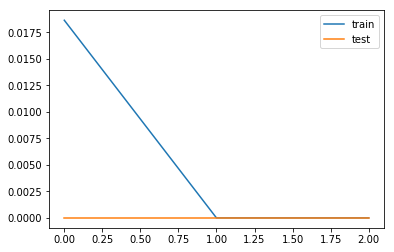

In [56]:
model_weights =(plt.plot(history.history['sensitivity'],label='train'),
plt.plot(history.history['val_sensitivity'],label='test'),
plt.legend(),
plt.show())
model_weights;

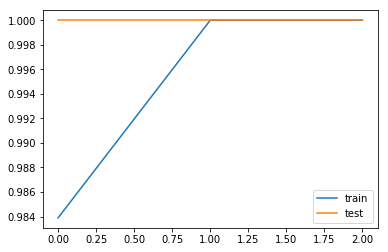

In [57]:
model_weights =(plt.plot(history.history['specificity'],label='train'),
plt.plot(history.history['val_specificity'],label='test'),
plt.legend(),
plt.show())
model_weights;

In [ ]:
y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size + 1, verbose = 1)
# y_pred = np.argmax(y_pred, axis = 1)

In [177]:
nb_validation_samples

271

In [286]:
y_pred_raw = model.predict_generator(validation_generator
                                 , nb_validation_samples // batch_size + 1
                                 , verbose = 2)

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


KeyboardInterrupt: 

In [287]:
y_pred_raw

array([[0.00765216],
       [0.07052924],
       [0.22499347],
       [0.08511125],
       [0.01255563],
       [0.10617551],
       [0.13452423],
       [0.06418201],
       [0.11712926],
       [0.03492822],
       [0.01607998],
       [0.2281423 ],
       [0.06372876],
       [0.33609465],
       [0.24707383],
       [0.06325835],
       [0.12318285],
       [0.13446331],
       [0.13432027],
       [0.14599288],
       [0.13952295],
       [0.09748102],
       [0.06355672],
       [0.05716991],
       [0.02832772],
       [0.23186396],
       [0.15973638],
       [0.12593593],
       [0.2754776 ],
       [0.08650997],
       [0.08430615],
       [0.17470524],
       [0.06683491],
       [0.23168801],
       [0.31433806],
       [0.04592609],
       [0.04759401],
       [0.06224074],
       [0.18005407],
       [0.04698564],
       [0.08694673],
       [0.21500833],
       [0.19352987],
       [0.03020878],
       [0.07559939],
       [0.1734774 ],
       [0.10356437],
       [0.172

In [347]:
y_pred = list(y_pred_raw.flatten())

y_pred = [1 if x>1 else 0 for x in y_pred]

In [348]:
len(y_pred)

255

In [339]:
# test_predictions = []
# for _ in range(nb_validation_samples // batch_size + 1):
#     temp = next(validation_generator)
#     test_predictions += [(model.predict(temp[0]), temp[1])]

In [340]:
# y_pred = 1 * (np.concatenate([x[0] for x in test_predictions]) > .65)

In [341]:
# y_test = np.concatenate([x[1] for x in test_predictions])

In [342]:
y_test = validation_generator.__dict__['classes']

In [343]:
# test_gen = ImageDataGenerator()
# validation_data_dir = '/Users/tovahirsch/Desktop/Capstone/Test_Images_new1'
# predictions = model.predict_generator(test_gen.flow(validation_data_dir))

In [349]:
len(y_test), len(y_pred)

(255, 255)

In [350]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[212   0]
 [ 43   0]]
             precision    recall  f1-score   support

          0       0.83      1.00      0.91       212
          1       0.00      0.00      0.00        43

avg / total       0.69      0.83      0.75       255



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [346]:
pd.DataFrame(confusion_matrix(y_test, y_pred) ,columns=['PN','PP'],index=['AN','AP'])

PN  PP
AN  212   0
AP   43   0

In [336]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['PN','PP'],index=['AN','AP'])

PN  PP
AN  174  38
AP   38   5

In [351]:
38*2

76